In [ ]:
# Importing Panda and NumPy

import numpy as np
import pandas as pd

In [ ]:
# Importing Dataset

df = pd.read_csv(r"/content/drive/MyDrive/spam.csv",encoding = "ISO-8859-1")

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2691,ham,Hey tmr meet at bugis 930 ?,NaN,NaN,NaN
4799,ham,its cool but tyler had to take off so we're go...,NaN,NaN,NaN
3339,ham,Like I made him throw up when we were smoking ...,NaN,NaN,NaN
1121,spam,Do you want 750 anytime any network mins 150 t...,NaN,NaN,NaN
3476,ham,I got it before the new year cos yetunde said ...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement

In [ ]:
# Data Cleaning Process

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Drop last 3 cols

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Renaming the columns

df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5033,ham,I want to go to perumbavoor
3762,ham,K.i will send in &lt;#&gt; min:)
861,ham,Your brother is a genius
2051,ham,Hey darlin.. i can pick u up at college if u t...
4843,spam,YOU HAVE WON! As a valued Vodafone customer ou...


In [ ]:
# Giving numerical value to categorical data

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Checking for missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# Check for duplicate values

df.duplicated().sum()

403

In [ ]:
# Remove duplicates

df = df.drop_duplicates(keep='first')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int64 
 1   text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [ ]:
df.shape

(5169, 2)

In [ ]:
# Exploratory Data Analysis

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Finding Number of ham and spam in target

df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

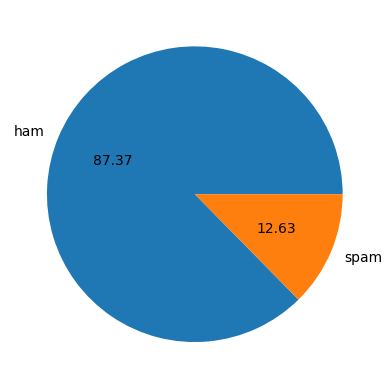

In [ ]:
#Plotting Pie chart
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
# Data is imbalanced

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Num of characters

df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Num of words

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# Num of sentences

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['target','num_characters','num_words','num_sentences']].describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

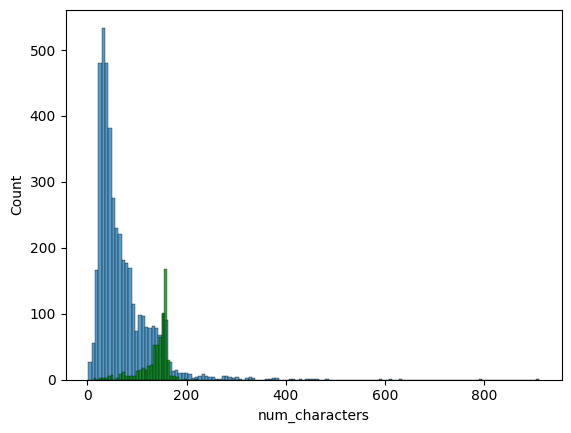

In [ ]:
import seaborn as sns

# Plotting Histplot

sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='green')

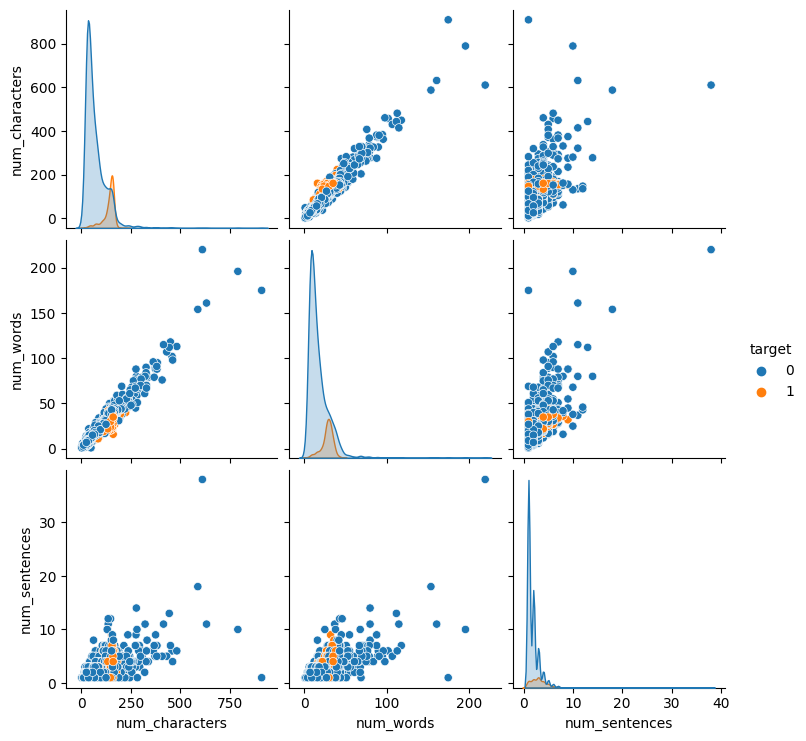

In [ ]:
# Plotting Pairplot

sns.pairplot(df,hue='target')

<ipython-input-30-ff8ad669e7b2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

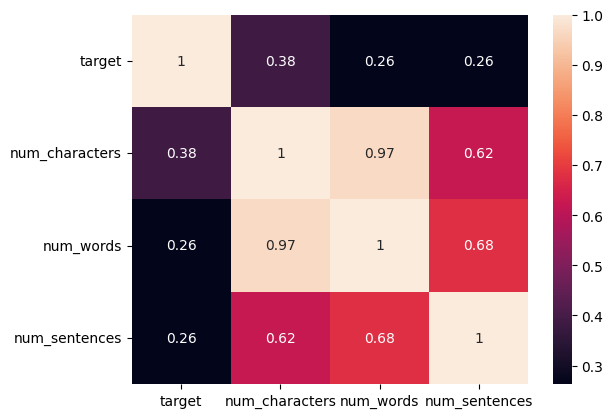

In [ ]:
# Plotting heatmap

sns.heatmap(df.corr(),annot=True)

In [ ]:
# Data Preprocessing

# Lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuation
# Stemming

In [ ]:
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


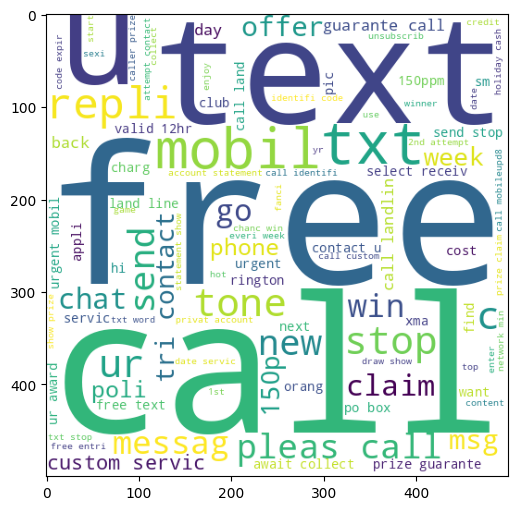

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

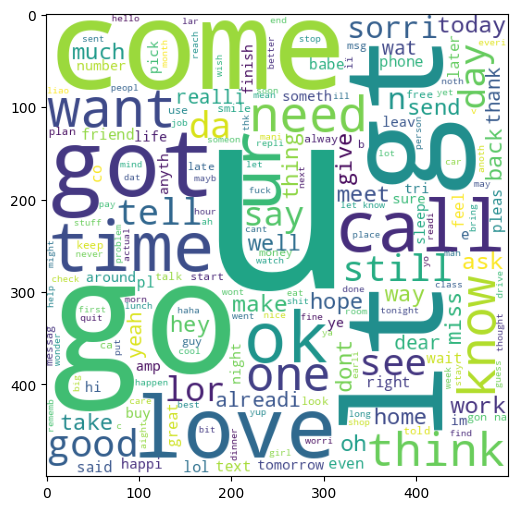

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

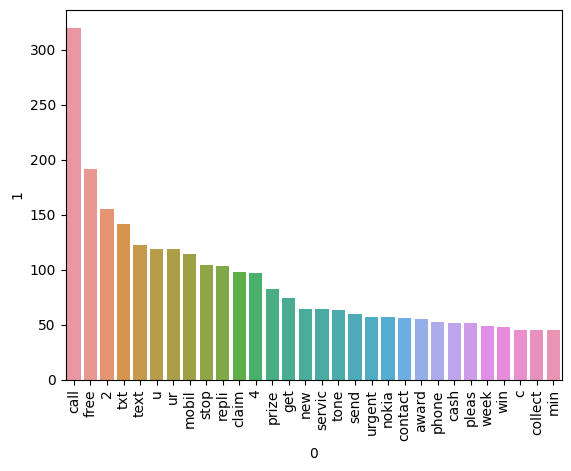

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
import numpy as np
a=np.unique(ham_corpus)
len(a)

5390

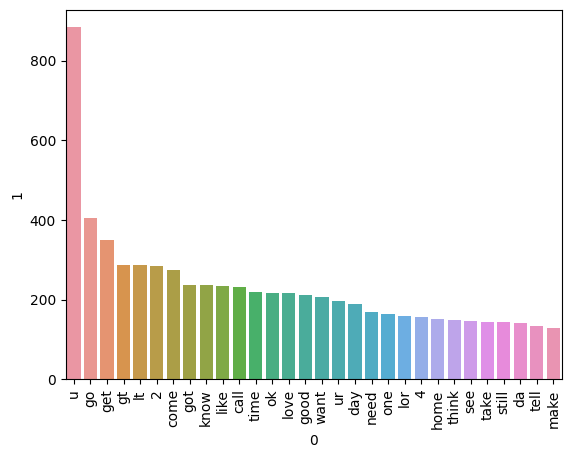

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
# Defining X
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
X.shape

(5169, 6708)

In [ ]:
# Defining y
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)


In [ ]:
def perform(y_pred):
  print("Accuracy : ", accuracy_score(y_test, y_pred))
  print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
  print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
  print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))


In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
perform(y_pred1)

Accuracy :  0.8607350096711799
Precision :  0.8607350096711799
Recall :  0.8607350096711799
F1 Score :  0.8607350096711799


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
perform(y_pred2)


Accuracy :  0.9526112185686654
Precision :  0.9526112185686654
Recall :  0.9526112185686654
F1 Score :  0.9526112185686654


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
perform(y_pred3)

Accuracy :  0.9535783365570599
Precision :  0.9535783365570599
Recall :  0.9535783365570599
F1 Score :  0.9535783365570599


In [ ]:
# tfidf --> BNB
# Applying Classification Techniques

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma='scale')
bnb = BernoulliNB()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'Support Vector Machine' : svc,
    'Naive bayes ': bnb,
    'Linear Regression': lrc,
    'K-Nearest Neighbour' : knc,
    'Random Forest': rfc
}

In [ ]:
def score_find(y_test,y_pred):
    Accuracy = accuracy_score(y_test,y_pred)
    Precision = precision_score(y_test,y_pred)
    Recall = recall_score(y_test, y_pred, average = 'micro')
    F1_score = f1_score(y_test, y_pred, average = 'micro')


    return Accuracy,Precision,Recall,F1_score

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

For Support Vector Machine

******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       899
           1       0.96      0.79      0.87       135

    accuracy                           0.97      1034
   macro avg       0.96      0.89      0.92      1034
weighted avg       0.97      0.97      0.97      1034

******************************************************

Accuracy -  0.9680851063829787
Precision -  0.9553571428571429
Recall -  0.9680851063829787
F1_score -  0.9680851063829787



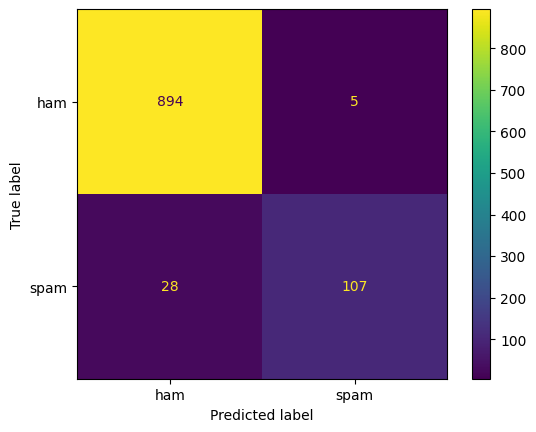

In [ ]:
print("For Support Vector Machine")
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print()
print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
print(classification_report(y_test, y_pred))
print("**"*27+"\n")

current_accuracy,current_precision,current_recall,current_F1 = score_find(y_test,y_pred)

print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("F1_score - ",current_F1)
print()

cm1 = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['ham', 'spam'])
cm1.plot()

accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)
f1_scores.append(current_F1)

For Bernoulli Naive Bayes

******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       899
           1       0.95      0.68      0.79       135

    accuracy                           0.95      1034
   macro avg       0.95      0.84      0.88      1034
weighted avg       0.95      0.95      0.95      1034

******************************************************

Accuracy -  0.9535783365570599
Precision -  0.9484536082474226
Recall -  0.9535783365570599
F1_score -  0.9535783365570599



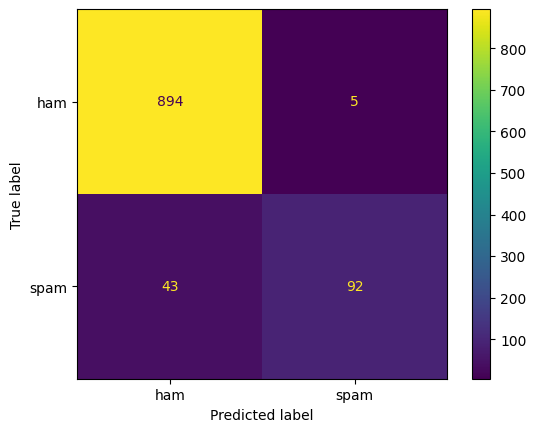

In [ ]:
print("For Bernoulli Naive Bayes")
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print()
print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
print(classification_report(y_test, y_pred))
print("**"*27+"\n")

current_accuracy,current_precision,current_recall,current_F1 = score_find(y_test,y_pred)

print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("F1_score - ",current_F1)
print()

cm1 = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['ham', 'spam'])
cm1.plot()

accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)
f1_scores.append(current_F1)

For Logistic Regression

******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       899
           1       0.88      0.62      0.73       135

    accuracy                           0.94      1034
   macro avg       0.91      0.80      0.85      1034
weighted avg       0.94      0.94      0.94      1034

******************************************************

Accuracy -  0.9400386847195358
Precision -  0.8842105263157894
Recall -  0.9400386847195358
F1_score -  0.9400386847195358



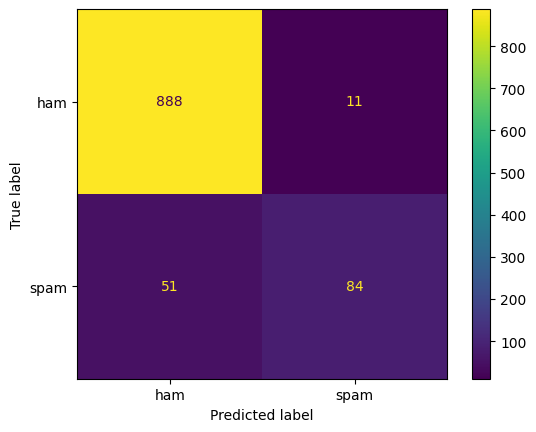

In [ ]:
print("For Logistic Regression")
lrc.fit(X_train,y_train)
y_pred = lrc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print()
print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
print(classification_report(y_test, y_pred))
print("**"*27+"\n")

current_accuracy,current_precision,current_recall,current_F1 = score_find(y_test,y_pred)

print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("F1_score - ",current_F1)
print()

cm1 = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['ham', 'spam'])
cm1.plot()

accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)
f1_scores.append(current_F1)

For K-Nearest Neighbour

******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       899
           1       1.00      0.24      0.38       135

    accuracy                           0.90      1034
   macro avg       0.95      0.62      0.66      1034
weighted avg       0.91      0.90      0.87      1034

******************************************************

Accuracy -  0.9003868471953579
Precision -  1.0
Recall -  0.9003868471953579
F1_score -  0.9003868471953579



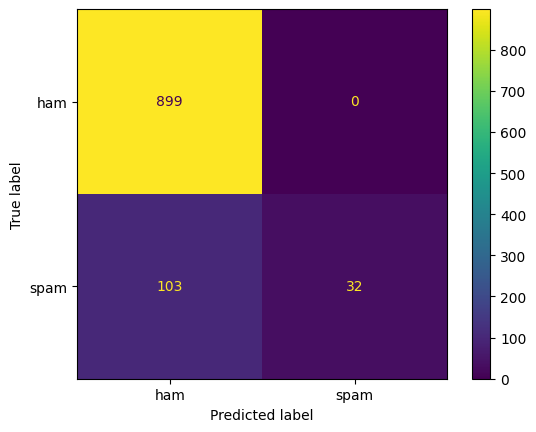

In [ ]:
print("For K-Nearest Neighbour")
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print()
print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
print(classification_report(y_test, y_pred))
print("**"*27+"\n")

current_accuracy,current_precision,current_recall,current_F1 = score_find(y_test,y_pred)

print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("F1_score - ",current_F1)
print()

cm1 = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['ham', 'spam'])
cm1.plot()

accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)
f1_scores.append(current_F1)

For Random Forest

******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       899
           1       1.00      0.72      0.84       135

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034

******************************************************

Accuracy -  0.9632495164410058
Precision -  1.0
Recall -  0.9632495164410058
F1_score -  0.9632495164410058



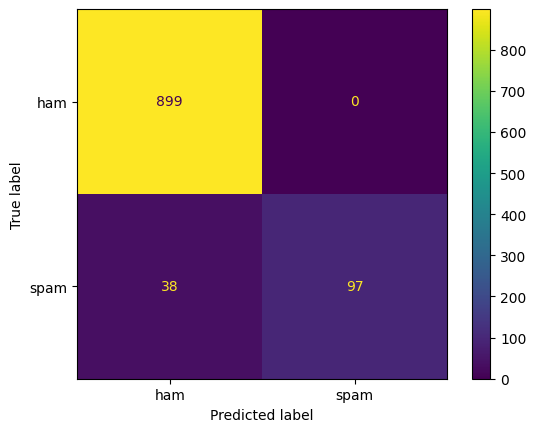

In [ ]:
print("For Random Forest")
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print()
print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
print(classification_report(y_test, y_pred))
print("**"*27+"\n")

current_accuracy,current_precision,current_recall,current_F1 = score_find(y_test,y_pred)

print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("F1_score - ",current_F1)
print()

cm1 = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['ham', 'spam'])
cm1.plot()

accuracy_scores.append(current_accuracy)
precision_scores.append(current_precision)
recall_scores.append(current_recall)
f1_scores.append(current_F1)

In [ ]:
print(accuracy_scores)
print(precision_scores)
print(recall_scores)
print(f1_scores)

[0.9680851063829787, 0.9535783365570599, 0.9400386847195358, 0.9003868471953579, 0.9632495164410058]
[0.9553571428571429, 0.9484536082474226, 0.8842105263157894, 1.0, 1.0]
[0.9680851063829787, 0.9535783365570599, 0.9400386847195358, 0.9003868471953579, 0.9632495164410058]
[0.9680851063829787, 0.9535783365570599, 0.9400386847195358, 0.9003868471953579, 0.9632495164410058]


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,
                               'Recall':recall_scores,'F1_Score':f1_scores}).sort_values('Precision',ascending=True)
performance_df

,Algorithm,Accuracy,Precision,Recall,F1_Score
2,Linear Regression,0.940039,0.884211,0.940039,0.940039
1,Naive bayes,0.953578,0.948454,0.953578,0.953578
0,Support Vector Machine,0.968085,0.955357,0.968085,0.968085
3,K-Nearest Neighbour,0.900387,1.000000,0.900387,0.900387
4,Random Forest,0.963250,1.000000,0.963250,0.963250


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,Linear Regression,Accuracy,0.940039
1,Naive bayes,Accuracy,0.953578
2,Support Vector Machine,Accuracy,0.968085
3,K-Nearest Neighbour,Accuracy,0.900387
4,Random Forest,Accuracy,0.963250
5,Linear Regression,Precision,0.884211
6,Naive bayes,Precision,0.948454
7,Support Vector Machine,Precision,0.955357
8,K-Nearest Neighbour,Precision,1.000000
9,Random Forest,Precision,1.000000


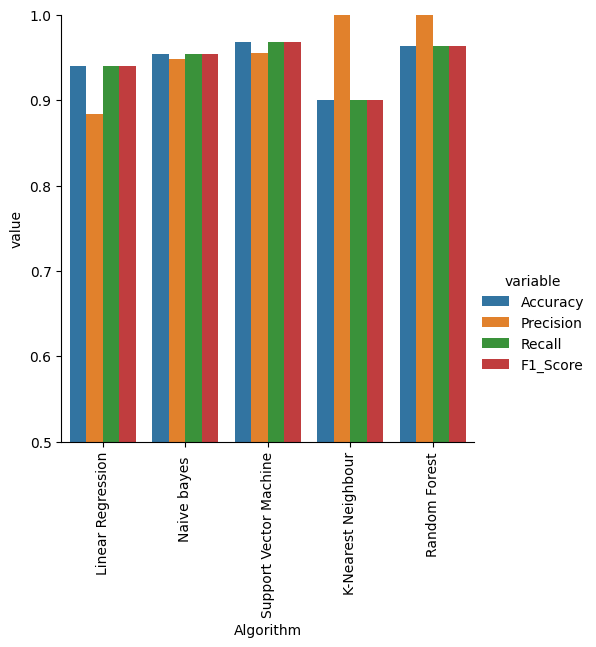

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Model improvement
# 1. Change the max_features parameter of TfIdf to 3000 and run code again and store scores in temp_df.

In [ ]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores,
#                    'Recall_max_ft_3000':recall_scores,'F1_score_max_ft_3000':f1_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [ ]:
# new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores,
#                   'Recall_scaling':recall_scores,'F1_score_scaling':f1_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
# new_df= new_df.merge(temp_df,on='Algorithm')

In [ ]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores,
#                  'Recall_num_chars':recall_scores,'F1_score_num_chars':f1_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
# new_df_final=new_df.merge(temp_df,on='Algorithm')

In [ ]:
# new_df_final